In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("Quote-Equity-ITC-EQ-01-01-2024-to-20-09-2024.csv")
df.head(5)

,Date,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
0,19-Sep-2024,EQ,510.00,514.80,507.50,507.35,508.60,508.25,510.59,520.5,399.35,"1,39,25,311","7,11,00,66,899.10","2,26,927"
1,18-Sep-2024,EQ,507.85,512.40,505.10,507.75,506.75,507.35,509.15,520.5,399.35,"54,29,619","2,76,45,06,352.10","98,908"
2,17-Sep-2024,EQ,511.05,513.55,506.25,511.10,508.25,507.75,508.55,520.5,399.35,"1,04,86,015","5,33,26,81,431.45","1,13,046"
3,16-Sep-2024,EQ,515.90,517.00,509.70,513.85,509.95,511.10,513.15,520.5,399.35,"75,31,604","3,86,48,31,357.30","80,552"
4,13-Sep-2024,EQ,519.50,520.00,512.00,519.50,513.65,513.85,513.81,520.5,399.35,"88,25,193","4,53,44,84,027.05","1,39,096"


In [3]:
df.shape

(180, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           180 non-null    object 
 1   series         180 non-null    object 
 2   OPEN           180 non-null    float64
 3   HIGH           180 non-null    float64
 4   LOW            180 non-null    float64
 5   PREV. CLOSE    180 non-null    float64
 6   ltp            180 non-null    float64
 7   close          180 non-null    float64
 8   vwap           180 non-null    float64
 9   52W H          180 non-null    float64
 10  52W L          180 non-null    float64
 11  VOLUME         180 non-null    object 
 12  VALUE          180 non-null    object 
 13  No of trades   180 non-null    object 
dtypes: float64(9), object(5)
memory usage: 19.8+ KB


In [5]:
df.describe()

,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,449.911944,453.951944,445.595278,449.167222,449.517500,449.423611,449.709111,502.760833,382.597222
std,32.978087,33.754521,33.060149,33.187091,33.438128,33.464669,33.434920,5.931403,24.648324
min,405.000000,406.500000,399.350000,403.350000,401.900000,403.350000,402.120000,499.700000,326.000000
25%,425.887500,429.050000,422.275000,425.275000,425.575000,425.275000,425.720000,499.700000,369.650000
50%,437.000000,440.475000,432.725000,436.375000,436.200000,436.375000,435.740000,499.700000,399.350000
75%,473.962500,479.412500,468.337500,472.712500,474.100000,474.100000,474.732500,499.700000,399.350000
max,519.500000,520.500000,512.000000,519.500000,518.050000,519.500000,516.480000,520.500000,399.350000


In [6]:
df.isnull().sum()

Date             0
series           0
OPEN             0
HIGH             0
LOW              0
PREV. CLOSE      0
ltp              0
close            0
vwap             0
52W H            0
52W L            0
VOLUME           0
VALUE            0
No of trades     0
dtype: int64

In [7]:
df.columns

Index(['Date ', 'series ', 'OPEN ', 'HIGH ', 'LOW ', 'PREV. CLOSE ', 'ltp ',
       'close ', 'vwap ', '52W H ', '52W L ', 'VOLUME ', 'VALUE ',
       'No of trades '],
      dtype='object')

In [8]:
df['Date '] = pd.to_datetime(df['Date '], format='%d-%b-%Y')

In [9]:
df['Date ']

0     2024-09-19
1     2024-09-18
2     2024-09-17
3     2024-09-16
4     2024-09-13
         ...    
175   2024-01-05
176   2024-01-04
177   2024-01-03
178   2024-01-02
179   2024-01-01
Name: Date , Length: 180, dtype: datetime64[ns]

In [10]:
df.columns

Index(['Date ', 'series ', 'OPEN ', 'HIGH ', 'LOW ', 'PREV. CLOSE ', 'ltp ',
       'close ', 'vwap ', '52W H ', '52W L ', 'VOLUME ', 'VALUE ',
       'No of trades '],
      dtype='object')

In [11]:
df.columns = df.columns.str.strip()  # Remove leading/trailing spaces


In [12]:
df.columns

Index(['Date', 'series', 'OPEN', 'HIGH', 'LOW', 'PREV. CLOSE', 'ltp', 'close',
       'vwap', '52W H', '52W L', 'VOLUME', 'VALUE', 'No of trades'],
      dtype='object')

In [13]:
df['VOLUME']=df['VOLUME'].str.replace(',','').astype(float)
df['VOLUME']

0      13925311.0
1       5429619.0
2      10486015.0
3       7531604.0
4       8825193.0
          ...    
175     9209405.0
176    11786959.0
177    24036012.0
178    10519771.0
179     9346277.0
Name: VOLUME, Length: 180, dtype: float64

In [14]:
df['VALUE']=df['VALUE'].str.replace(',','').astype(float)
df['VALUE']

0      7.110067e+09
1      2.764506e+09
2      5.332681e+09
3      3.864831e+09
4      4.534484e+09
           ...     
175    4.374281e+09
176    5.641470e+09
177    1.147471e+10
178    4.926002e+09
179    4.366127e+09
Name: VALUE, Length: 180, dtype: float64

In [15]:
df['No of trades']=df['No of trades'].str.replace(",","").astype(int)
df['No of trades']

0      226927
1       98908
2      113046
3       80552
4      139096
        ...  
175    191991
176    145887
177    270703
178    159124
179    167073
Name: No of trades, Length: 180, dtype: int32

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          180 non-null    datetime64[ns]
 1   series        180 non-null    object        
 2   OPEN          180 non-null    float64       
 3   HIGH          180 non-null    float64       
 4   LOW           180 non-null    float64       
 5   PREV. CLOSE   180 non-null    float64       
 6   ltp           180 non-null    float64       
 7   close         180 non-null    float64       
 8   vwap          180 non-null    float64       
 9   52W H         180 non-null    float64       
 10  52W L         180 non-null    float64       
 11  VOLUME        180 non-null    float64       
 12  VALUE         180 non-null    float64       
 13  No of trades  180 non-null    int32         
dtypes: datetime64[ns](1), float64(11), int32(1), object(1)
memory usage: 19.1+ KB


In [17]:
df.head()

,Date,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
0,2024-09-19,EQ,510.00,514.80,507.50,507.35,508.60,508.25,510.59,520.5,399.35,13925311.0,7.110067e+09,226927
1,2024-09-18,EQ,507.85,512.40,505.10,507.75,506.75,507.35,509.15,520.5,399.35,5429619.0,2.764506e+09,98908
2,2024-09-17,EQ,511.05,513.55,506.25,511.10,508.25,507.75,508.55,520.5,399.35,10486015.0,5.332681e+09,113046
3,2024-09-16,EQ,515.90,517.00,509.70,513.85,509.95,511.10,513.15,520.5,399.35,7531604.0,3.864831e+09,80552
4,2024-09-13,EQ,519.50,520.00,512.00,519.50,513.65,513.85,513.81,520.5,399.35,8825193.0,4.534484e+09,139096


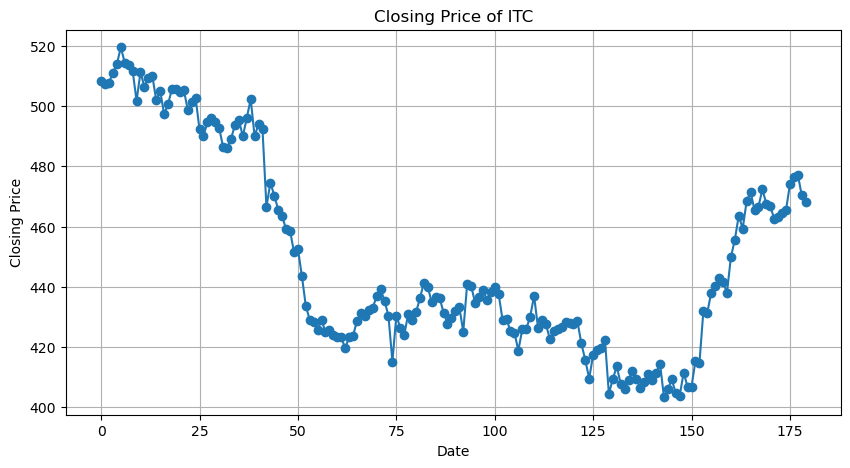

In [18]:
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['close'], marker='o')
plt.title('Closing Price of ITC')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.grid(True)
plt.show()

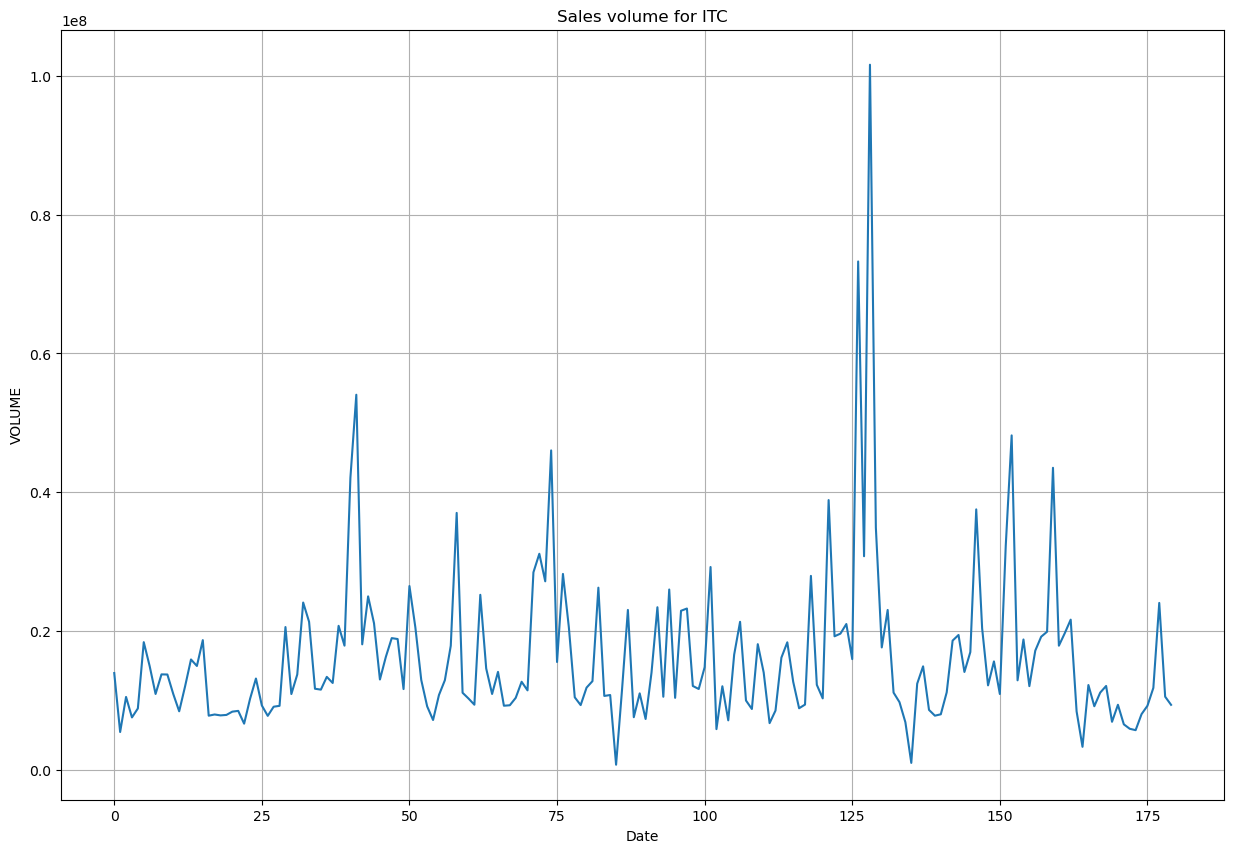

In [19]:
plt.figure(figsize=(15,10))
plt.plot(df.index, df['VOLUME'])
plt.title("Sales volume for ITC")
plt.xlabel('Date')
plt.ylabel('VOLUME')
plt.grid(True)
plt.show()

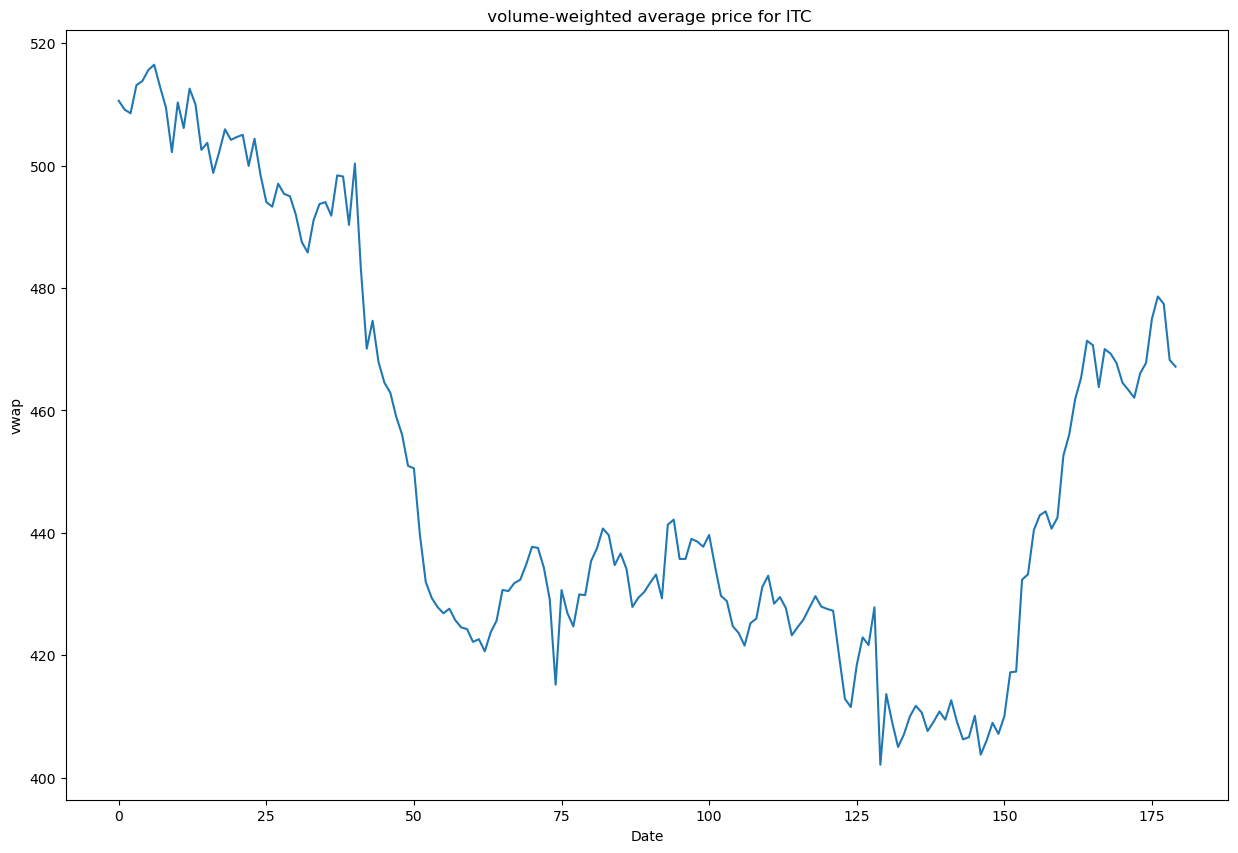

In [20]:
plt.figure(figsize=(15,10))
plt.plot(df.index, df['vwap'])
plt.title(" volume-weighted average price for ITC")
plt.xlabel('Date')
plt.ylabel('vwap')
plt.show()

In [21]:
df.columns = df.columns.str.strip()
df.columns

Index(['Date', 'series', 'OPEN', 'HIGH', 'LOW', 'PREV. CLOSE', 'ltp', 'close',
       'vwap', '52W H', '52W L', 'VOLUME', 'VALUE', 'No of trades'],
      dtype='object')

In [22]:
# Convert 'close' column to numeric, forcing any non-numeric values to NaN
df['close'] = pd.to_numeric(df['close'], errors='coerce')

# Check if conversion was successful
print(df['close'].dtype)


float64


In [23]:
data=df[['Date', 'close']]
data

,Date,close
0,2024-09-19,508.25
1,2024-09-18,507.35
2,2024-09-17,507.75
3,2024-09-16,511.10
4,2024-09-13,513.85
...,...,...
175,2024-01-05,473.95
176,2024-01-04,476.40
177,2024-01-03,477.25
178,2024-01-02,470.35


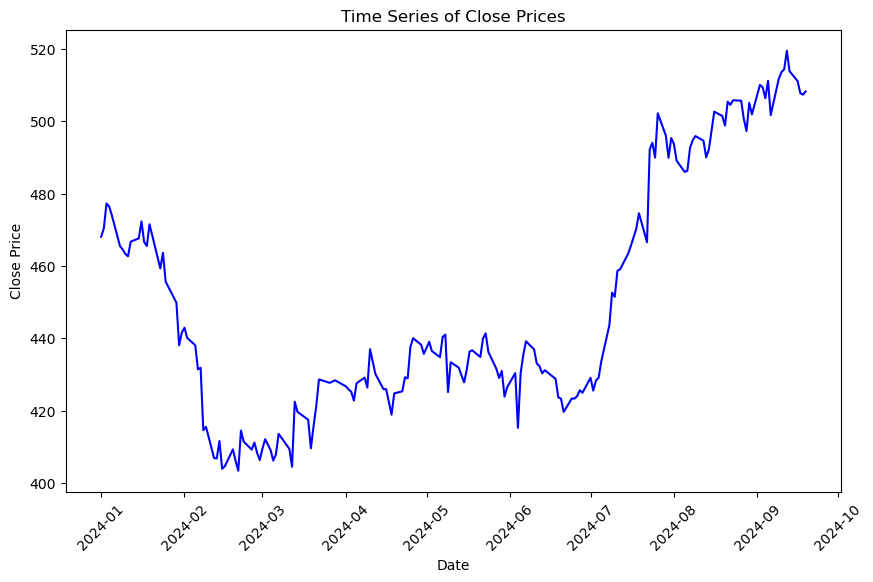

In [24]:
# Step 1: Convert 'close' column to numeric, coercing errors to NaN
df['close'] = pd.to_numeric(df['close'], errors='coerce')

# Step 2: Drop rows with NaN in 'close' column
df = df.dropna(subset=['close'])

# Convert 'Date' to datetime format for plotting
df['Date'] = pd.to_datetime(df['Date'])

# Step 3: Plot the cleaned data
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['close'], label='Close Price', color='b')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Time Series of Close Prices')
plt.xticks(rotation=45)
plt.show()


In [25]:
data.set_index('Date', inplace=True)
rolmean = data['close'].rolling(window=12).mean()
rolstd = data['close'].rolling(window=12).std()
print(rolmean.head(15))


Date
2024-09-19           NaN
2024-09-18           NaN
2024-09-17           NaN
2024-09-16           NaN
2024-09-13           NaN
2024-09-12           NaN
2024-09-11           NaN
2024-09-10           NaN
2024-09-09           NaN
2024-09-06           NaN
2024-09-05           NaN
2024-09-04    510.562500
2024-09-03    510.658333
2024-09-02    510.883333
2024-08-30    510.395833
Name: close, dtype: float64


In [26]:
numeric_columns = data.select_dtypes(include='number')
rolmean = numeric_columns.rolling(window=12).mean()
rolstd = numeric_columns.rolling(window=12).std()
print(rolmean.head(15))
print(rolstd.head(15))

                 close
Date                  
2024-09-19         NaN
2024-09-18         NaN
2024-09-17         NaN
2024-09-16         NaN
2024-09-13         NaN
2024-09-12         NaN
2024-09-11         NaN
2024-09-10         NaN
2024-09-09         NaN
2024-09-06         NaN
2024-09-05         NaN
2024-09-04  510.562500
2024-09-03  510.658333
2024-09-02  510.883333
2024-08-30  510.395833
               close
Date                
2024-09-19       NaN
2024-09-18       NaN
2024-09-17       NaN
2024-09-16       NaN
2024-09-13       NaN
2024-09-12       NaN
2024-09-11       NaN
2024-09-10       NaN
2024-09-09       NaN
2024-09-06       NaN
2024-09-05       NaN
2024-09-04  4.634168
2024-09-03  4.593713
2024-09-02  4.481697
2024-08-30  5.125447


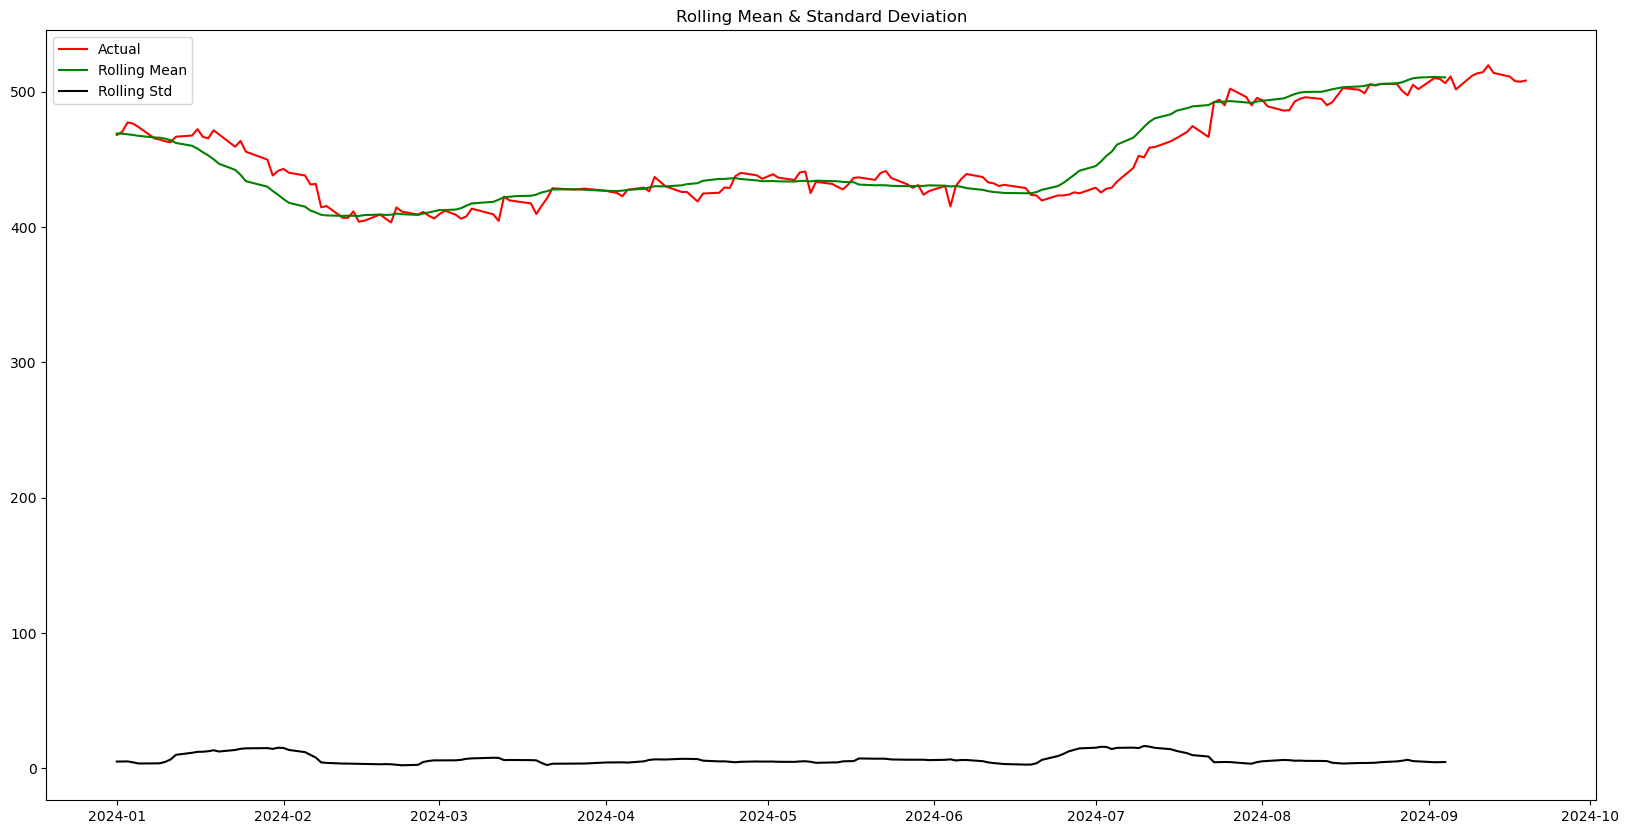

In [27]:
plt.figure(figsize=(20,10))
actual=plt.plot(data, color='red', label='Actual')
mean_6=plt.plot(rolmean, color='green', label='Rolling Mean') 
std_6=plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [28]:
from statsmodels.tsa.stattools import adfuller
print('Dickey-Fuller Test: ')
dftest=adfuller(data['close'], autolag='AIC')
dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','No. of Obs'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Dickey-Fuller Test: 
Test Statistic           -1.863494
p-value                   0.349425
Lags Used                 3.000000
No. of Obs              176.000000
Critical Value (1%)      -3.468062
Critical Value (5%)      -2.878106
Critical Value (10%)     -2.575602
dtype: float64


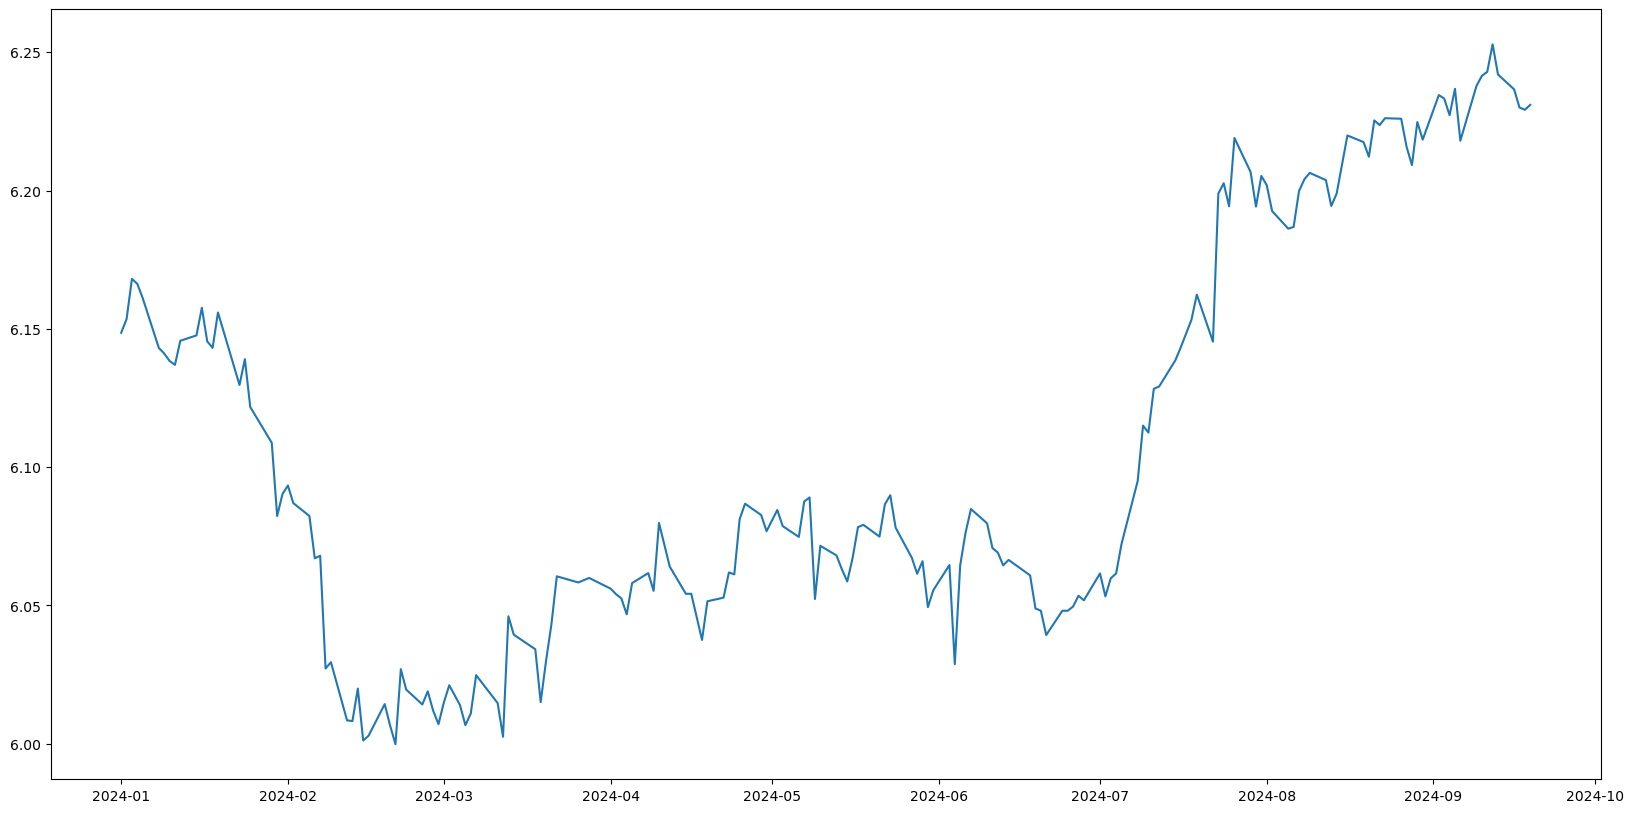

In [29]:
plt.figure(figsize=(20,10))
data_log=np.log(data)
plt.plot(data_log)

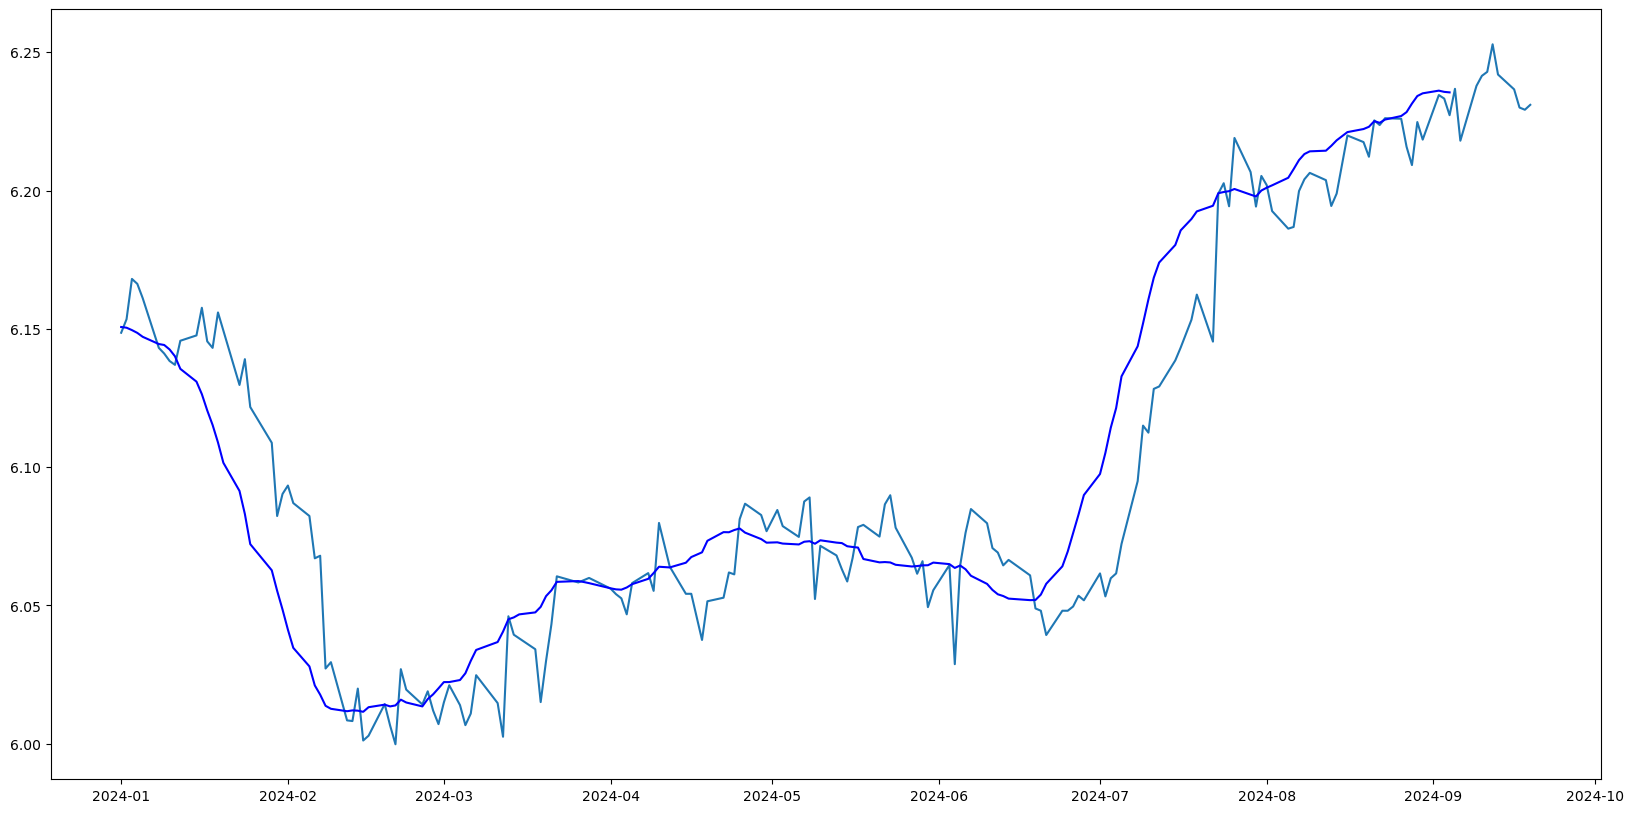

In [30]:
plt.figure(figsize=(20,10))
MAvg=data_log.rolling(window=12).mean()
MStd=data_log.rolling(window=12).std()
plt.plot(data_log)
plt.plot(MAvg, color='blue')

In [31]:
data_log_diff=data_log-MAvg
data_log_diff.head(12)

,close
Date,
2024-09-19,NaN
2024-09-18,NaN
2024-09-17,NaN
2024-09-16,NaN
2024-09-13,NaN
2024-09-12,NaN
2024-09-11,NaN
2024-09-10,NaN
2024-09-09,NaN


In [32]:
data_log_diff=data_log_diff.dropna()
data_log_diff.head()

,close
Date,
2024-09-04,-0.008247
2024-09-03,-0.002430
2024-09-02,-0.001597
2024-08-30,-0.016739
2024-08-29,-0.009400


In [33]:
def stationarity(timeseries):
    
    rolmean=timeseries.rolling(window=12).mean()
    rolstd=timeseries.rolling(window=12).std()
    
    plt.figure(figsize=(20,10))
    actual=plt.plot(timeseries, color='red', label='Actual')
    mean_6=plt.plot(rolmean, color='green', label='Rolling Mean') 
    std_6=plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    print('Dickey-Fuller Test: ')
    dftest=adfuller(timeseries['close'], autolag='AIC')
    dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','No. of Obs'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

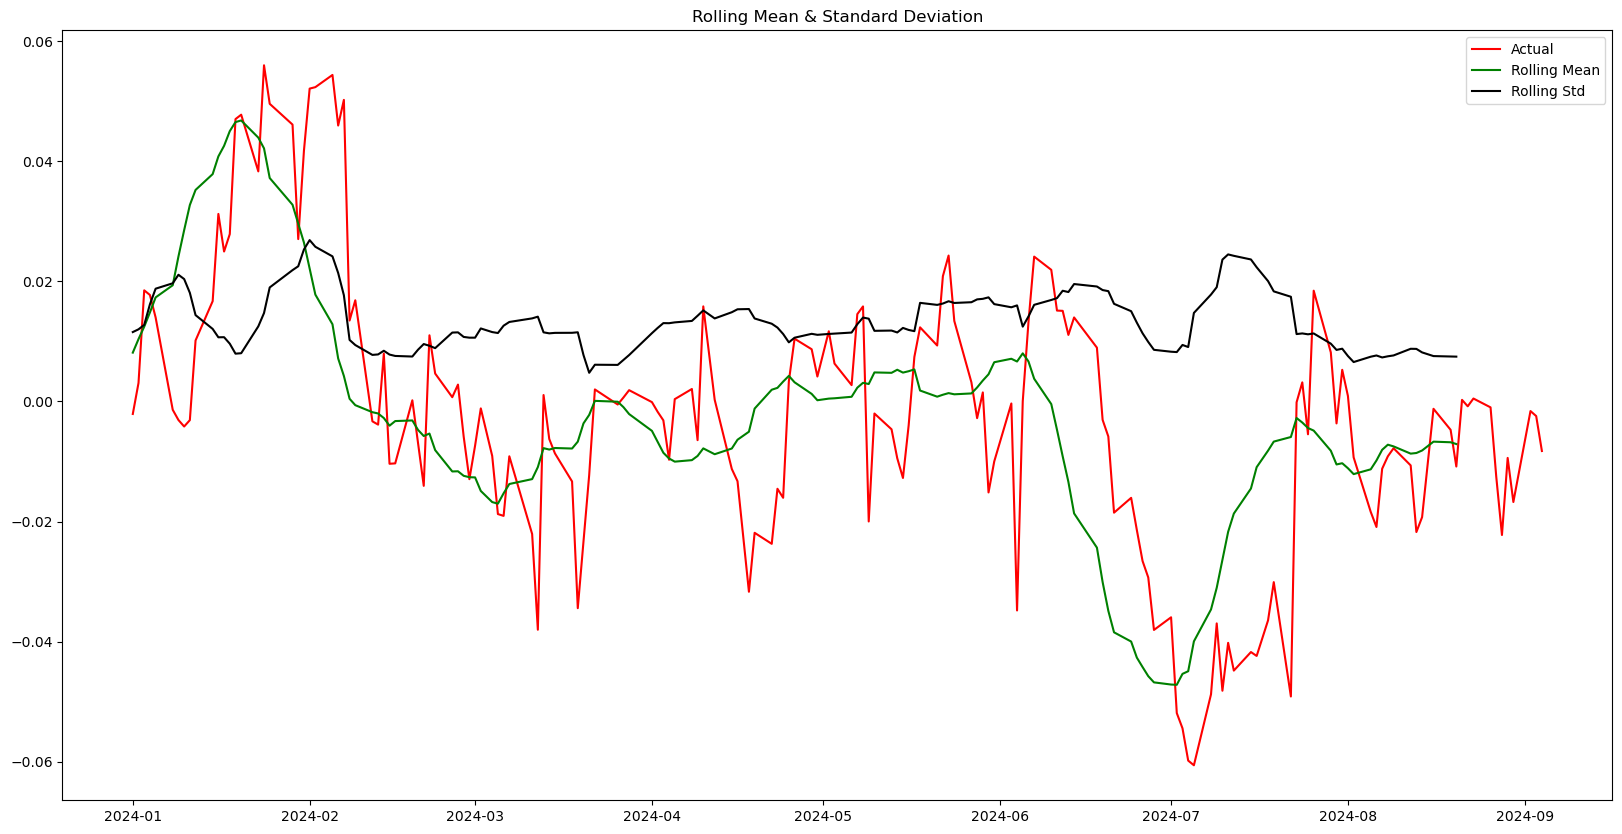

Dickey-Fuller Test: 
Test Statistic           -2.985810
p-value                   0.036241
Lags Used                 3.000000
No. of Obs              165.000000
Critical Value (1%)      -3.470616
Critical Value (5%)      -2.879221
Critical Value (10%)     -2.576197
dtype: float64


In [34]:
stationarity(data_log_diff)

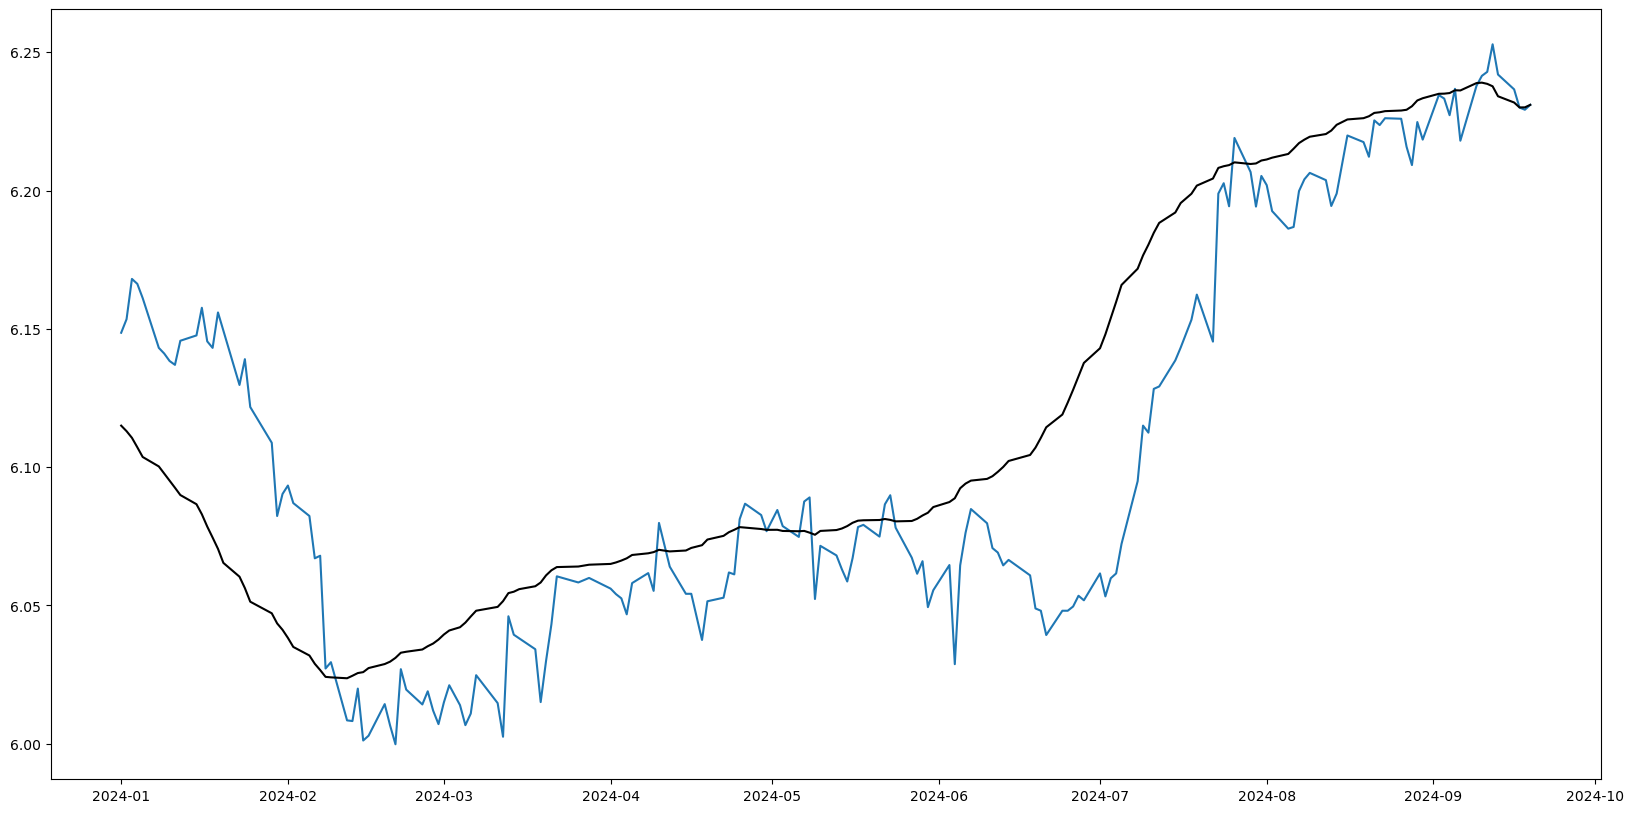

In [35]:
plt.figure(figsize=(20,10))
exp_data=data_log.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(data_log)
plt.plot(exp_data, color='black')

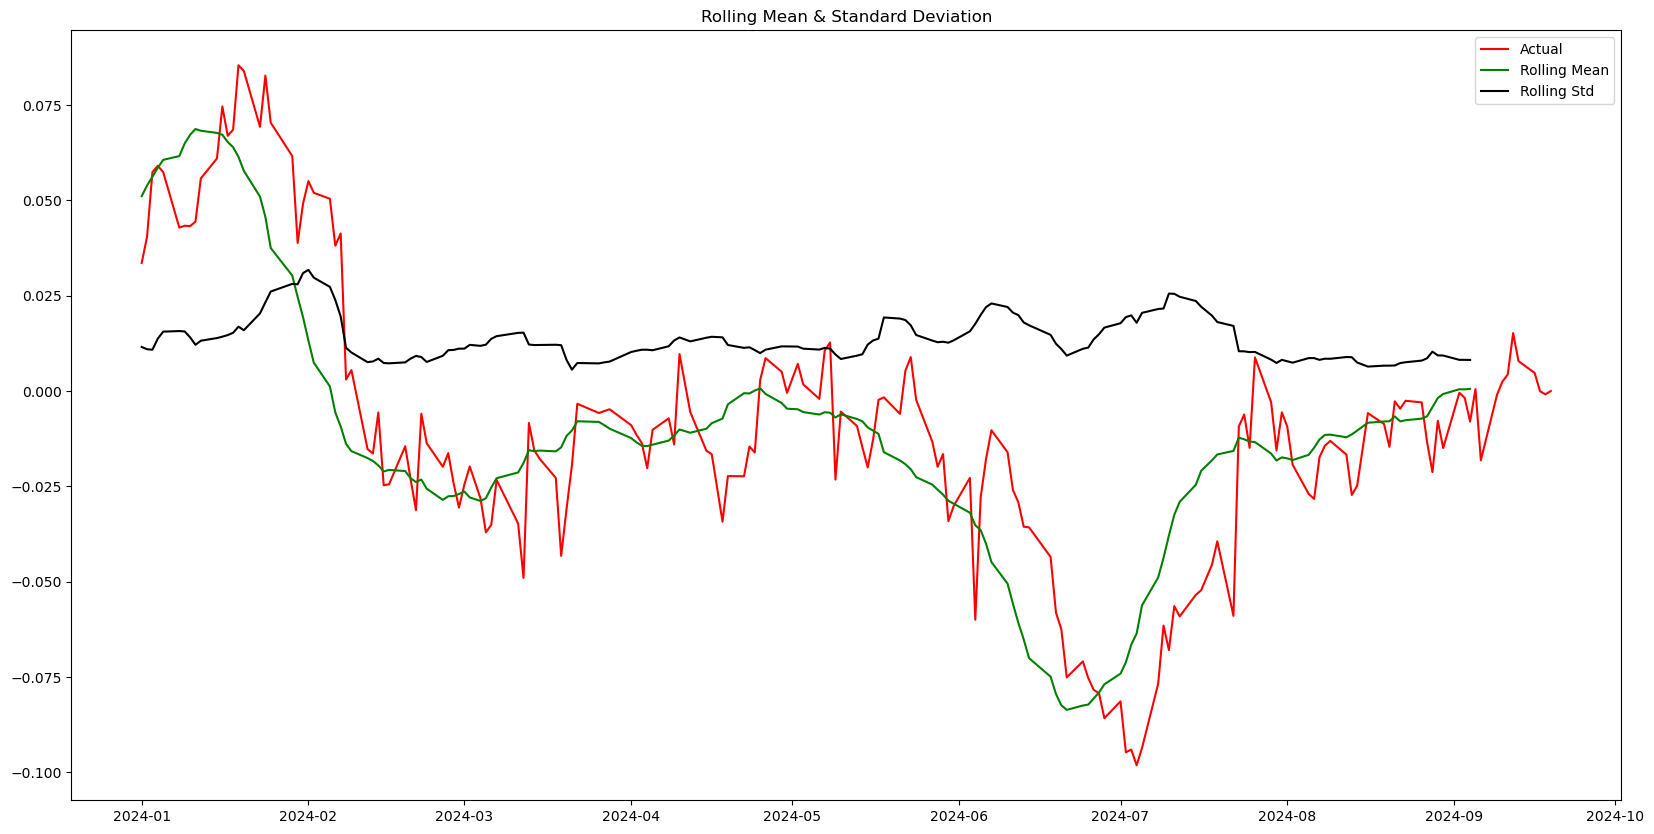

Dickey-Fuller Test: 
Test Statistic           -1.685914
p-value                   0.438384
Lags Used                 3.000000
No. of Obs              176.000000
Critical Value (1%)      -3.468062
Critical Value (5%)      -2.878106
Critical Value (10%)     -2.575602
dtype: float64


In [36]:
exp_data_diff=data_log-exp_data
stationarity(exp_data_diff)

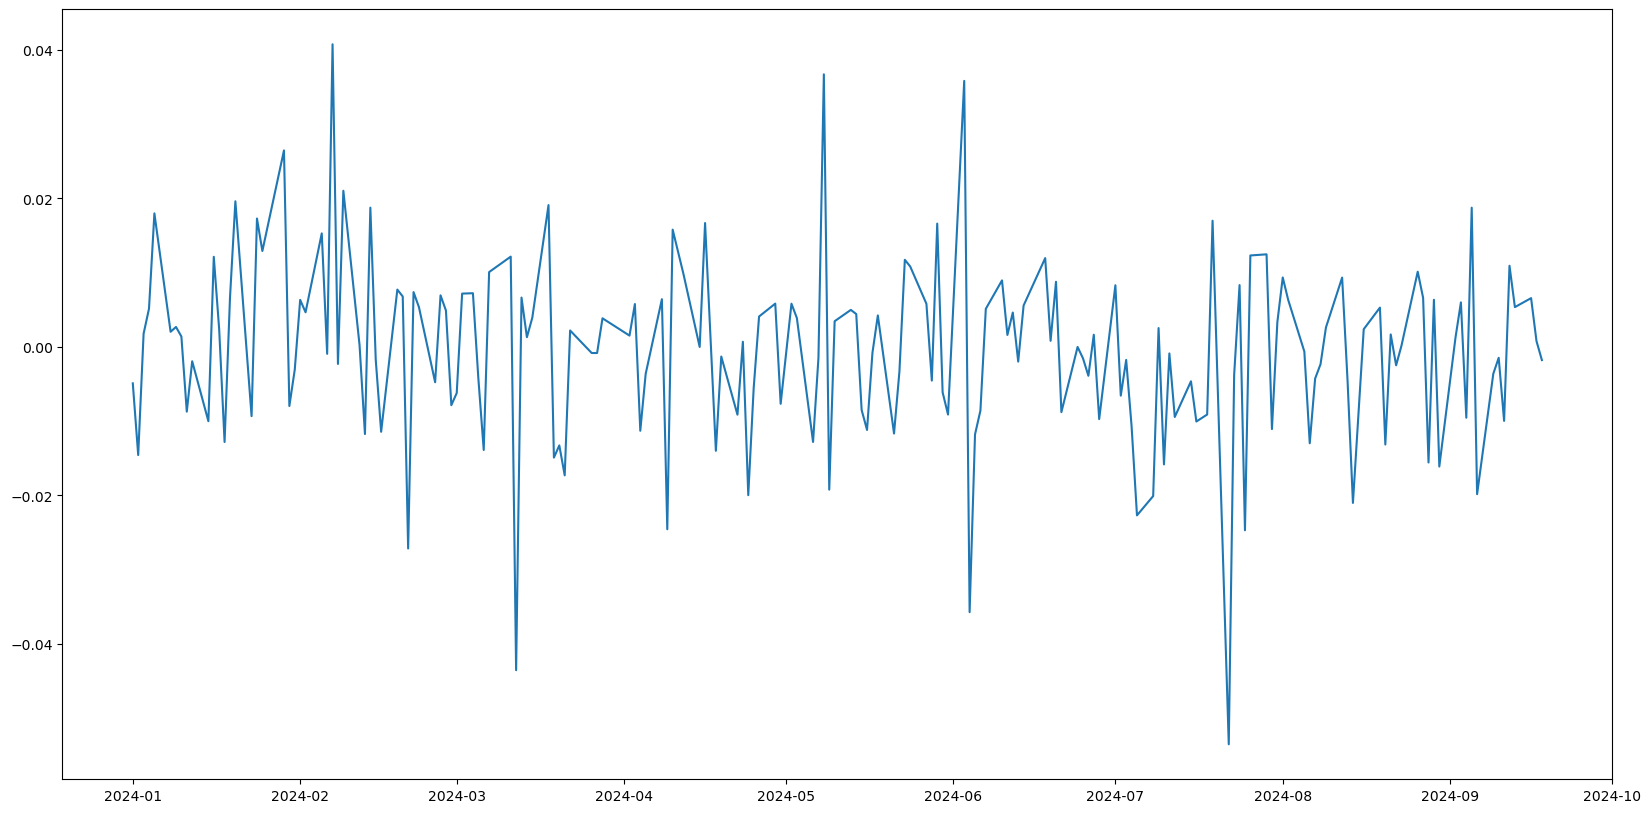

In [37]:
plt.figure(figsize=(20,10))
data_shift=data_log-data_log.shift()
plt.plot(data_shift)

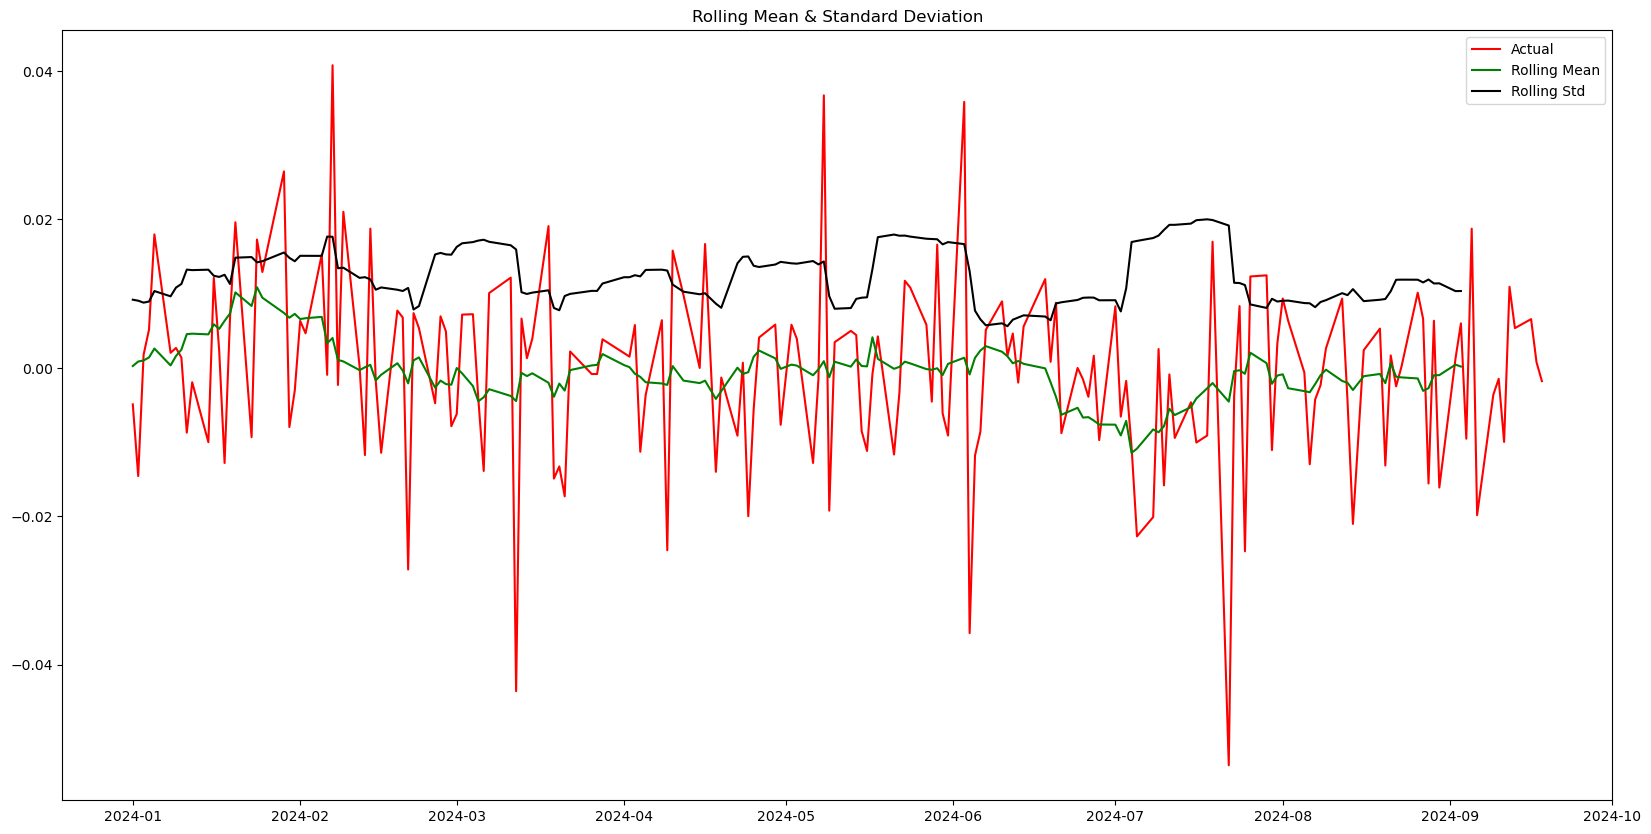

Dickey-Fuller Test: 
Test Statistic         -6.660120e+00
p-value                 4.871037e-09
Lags Used               2.000000e+00
No. of Obs              1.760000e+02
Critical Value (1%)    -3.468062e+00
Critical Value (5%)    -2.878106e+00
Critical Value (10%)   -2.575602e+00
dtype: float64


In [38]:
data_shift=data_shift.dropna()
stationarity(data_shift)

In [39]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomp = seasonal_decompose(data_log, model='additive', period=4)  # Set period based on your data
decomp

2024-01-01    3.178054
2024-01-02    3.178054
2024-01-03    3.332205
2024-01-04    2.708050
2024-01-05    2.944439
                ...   
2024-09-16    2.708050
2024-09-17    2.833213
2024-09-18    2.944439
2024-09-19    2.639057
2024-09-20    2.890372
Freq: D, Length: 264, dtype: float64


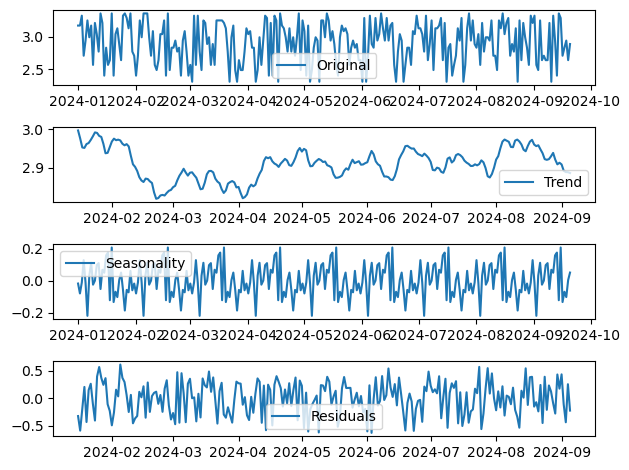

In [40]:

from statsmodels.tsa.seasonal import seasonal_decompose

# Create a date range from January 1, 2024, to September 20, 2024
date_rng = pd.date_range(start='2024-01-01', end='2024-09-20', freq='D')  # Daily frequency

# Create example data (you can replace this with your actual data)
# Here we create some random data; make sure to have at least two cycles for proper decomposition.
data = np.random.randint(10, 30, size=len(date_rng))  # Random data for demonstration

# Create a pandas Series with a DatetimeIndex
data_series = pd.Series(data, index=date_rng)

# Log transform if necessary
data_log = np.log(data_series)

# Check the data to ensure it's formatted correctly
print(data_log)

# Decompose the time series (you can specify the period if needed)
# Since you have data from January to September (approximately 9 months), you may want to set period to 30 for monthly seasonality.
decomp = seasonal_decompose(data_log, model='additive', period=30)  # Set period for monthly seasonality

# Extract components
trend = decomp.trend
seasonal = decomp.seasonal
residual = decomp.resid

# Plotting the components
plt.subplot(411)
plt.plot(data_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()


In [41]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

In [42]:
result = adfuller(data_log)
print('ADF Statistic:', result[0])
print('p-value:', result[1])


ADF Statistic: -16.107618366402686
p-value: 5.052973215572268e-29


In [43]:
data_diff = data_log.diff().dropna()


In [44]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


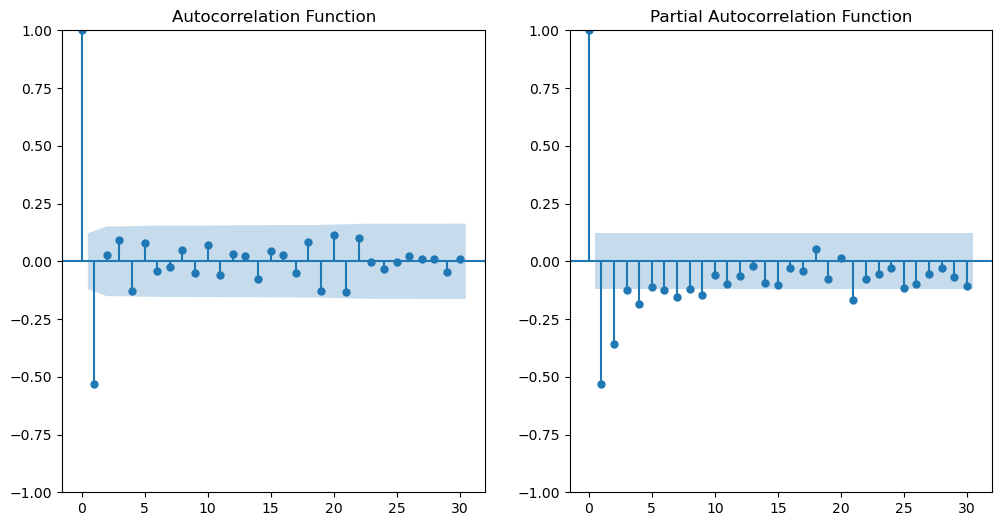

In [45]:
plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(data_diff, lags=30, ax=plt.gca())
plt.title('Autocorrelation Function')

plt.subplot(122)
plot_pacf(data_diff, lags=30, ax=plt.gca())
plt.title('Partial Autocorrelation Function')

plt.show()


In [46]:
p = 5  #  value for AR terms
d = 1  # Differencing
q = 5  #  value for MA terms


In [47]:
model = ARIMA(data_log, order=(p, d, q))
model_fit = model.fit()



D:\Anaconda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [48]:
forecast = model_fit.forecast(steps=10)


In [49]:
forecast_index = pd.date_range(start=data_log.index[-1] + pd.Timedelta(days=1), 
                               periods=10, freq='D')


In [50]:
forecast_index

DatetimeIndex(['2024-09-21', '2024-09-22', '2024-09-23', '2024-09-24',
               '2024-09-25', '2024-09-26', '2024-09-27', '2024-09-28',
               '2024-09-29', '2024-09-30'],
              dtype='datetime64[ns]', freq='D')

In [51]:
forecast_df = pd.Series(forecast, index=forecast_index)


In [52]:
forecast_df

2024-09-21    3.025809
2024-09-22    2.950605
2024-09-23    2.903154
2024-09-24    2.907499
2024-09-25    2.803640
2024-09-26    3.016302
2024-09-27    2.931572
2024-09-28    2.885326
2024-09-29    2.927728
2024-09-30    2.821704
Freq: D, Name: predicted_mean, dtype: float64

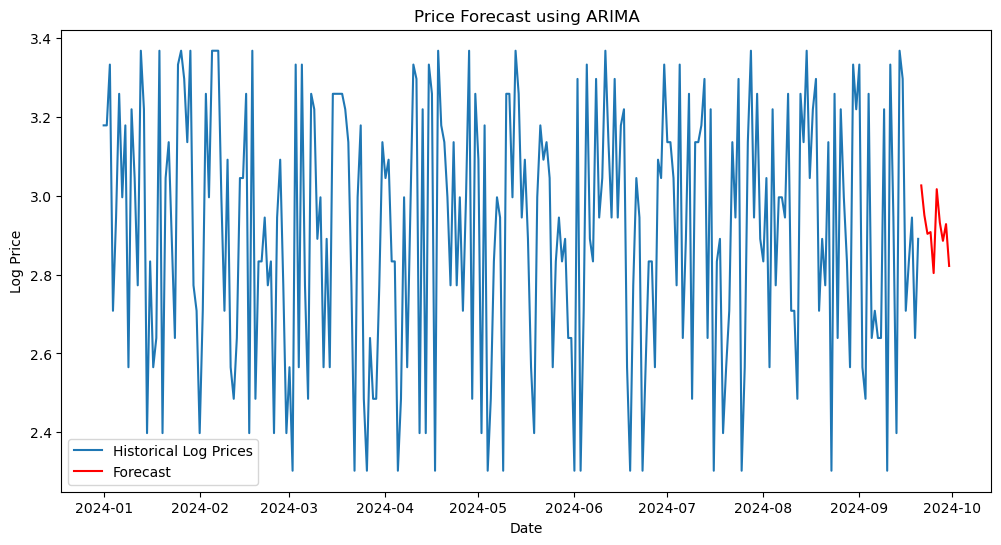

In [53]:
plt.figure(figsize=(12, 6))
plt.plot(data_log, label='Historical Log Prices')
plt.plot(forecast_df, label='Forecast', color='red')
plt.title('Price Forecast using ARIMA')
plt.xlabel('Date')
plt.ylabel('Log Price')
plt.legend()
plt.show()
